# Modeling with the Clean Dataset

### Importing and Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import ConfusionMatrixDisplay 

In [2]:
df = pd.read_csv('cleaned_airline_passenger_satisfaction.csv')

In [3]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [4]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [5]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Baseline

In [6]:
df['satisfaction'].value_counts(normalize = True)

satisfaction
0    0.566667
1    0.433333
Name: proportion, dtype: float64

In [7]:
X = df.drop(columns = 'satisfaction')
y = df['satisfaction']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [9]:
sc = StandardScaler()

In [10]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### KNN loading

In [11]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [12]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=9)

In [13]:
knn.score(X_train_sc, y_train)

0.9399445642131198

In [14]:
knn.score(X_test_sc, y_test)

0.9271635355712966

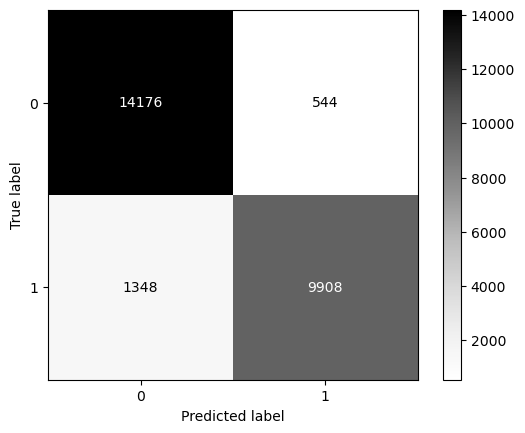

In [15]:
ConfusionMatrixDisplay.from_estimator(knn,
                                      X_test_sc,
                                      y_test,
                                      cmap = 'Greys');

In [16]:
knn = KNeighborsClassifier(n_neighbors = 13)

knn.fit(X_train_sc, y_train)

knn.score(X_test_sc, y_test)

0.9270865414228519

In [17]:
scores = []
for k in range(3, 32, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    scores.append({'k':k, 'train_score':train_score, 'test_score':test_score})
df_score = pd.DataFrame(scores)

In [18]:
scores

[{'k': 3, 'train_score': 0.9581793450364439, 'test_score': 0.9253156760086233},
 {'k': 5, 'train_score': 0.9480546145159634, 'test_score': 0.9273560209424084},
 {'k': 7, 'train_score': 0.9434606303254286, 'test_score': 0.9261626116415153},
 {'k': 9, 'train_score': 0.9399445642131198, 'test_score': 0.9271635355712966},
 {'k': 11,
  'train_score': 0.9376347397597783,
  'test_score': 0.9267015706806283},
 {'k': 13,
  'train_score': 0.9365824863977005,
  'test_score': 0.9270865414228519},
 {'k': 15,
  'train_score': 0.9351837593676214,
  'test_score': 0.9263935940868494},
 {'k': 17,
  'train_score': 0.9340416794990247,
  'test_score': 0.9260471204188482},
 {'k': 19,
  'train_score': 0.9329252643465763,
  'test_score': 0.9251616877117339},
 {'k': 21,
  'train_score': 0.9319500051329432,
  'test_score': 0.9260086233446259},
 {'k': 23,
  'train_score': 0.9317190226876091,
  'test_score': 0.9256621496766245},
 {'k': 25,
  'train_score': 0.9311928960065702,
  'test_score': 0.9243532491530644},


In [19]:
df_score

,k,train_score,test_score
0,3,0.958179,0.925316
1,5,0.948055,0.927356
2,7,0.943461,0.926163
3,9,0.939945,0.927164
4,11,0.937635,0.926702
5,13,0.936582,0.927087
6,15,0.935184,0.926394
7,17,0.934042,0.926047
8,19,0.932925,0.925162
9,21,0.931950,0.926009


In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.score(X_train_sc, y_train)

0.9581793450364439

In [22]:
knn.score(X_test_sc, y_test)

0.9253156760086233

92% accuracy for this test however, this is a gap of 3.3% between training and test indicates the model is overfitting.

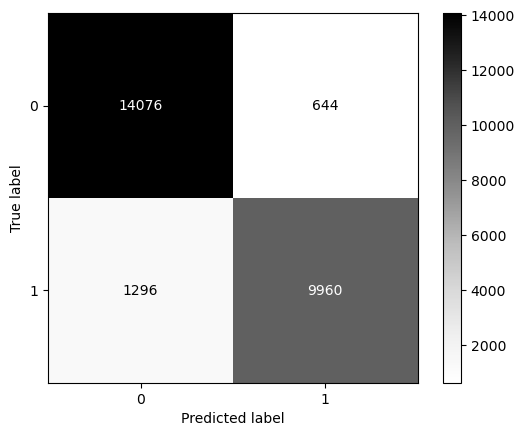

In [23]:
ConfusionMatrixDisplay.from_estimator(knn,
                                      X_test_sc,
                                      y_test,
                                      cmap = 'Greys');

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [26]:
logr.score(X_train_sc, y_train)

0.8753079765937789

In [27]:
logr.score(X_test_sc, y_test)

0.8762319063751155

Features for the model are highly informative and not overfitting.

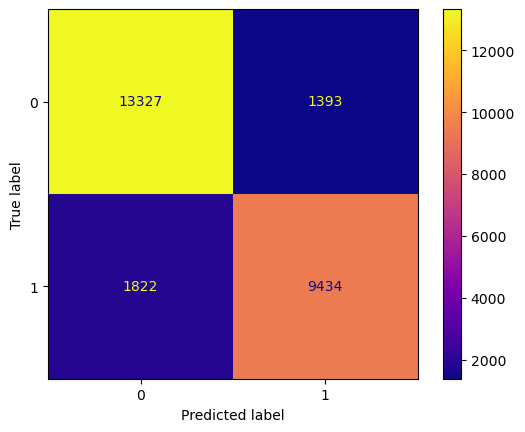

In [28]:
ConfusionMatrixDisplay.from_estimator(logr,
                                      X_test_sc,
                                      y_test,
                                      cmap = 'plasma');

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [31]:
rf.score(X_train_sc, y_train)

1.0

In [32]:
rf.score(X_test_sc, y_test)

0.9610024638127502

This model is overfitting pretty bad. This model is generalizing the information well despite the overfit.

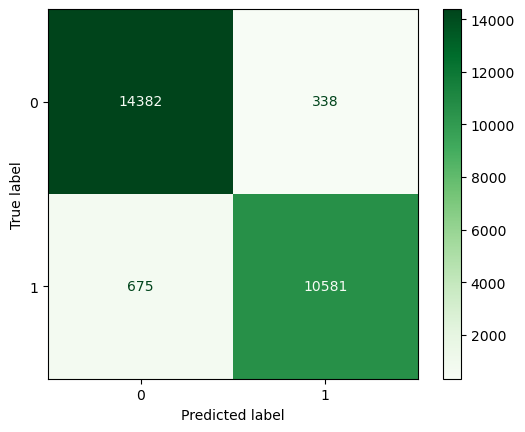

In [33]:
ConfusionMatrixDisplay.from_estimator(rf,
                                      X_test_sc,
                                      y_test,
                                      cmap = 'Greens');

In [34]:
logr.coef_

array([[ 0.01010315, -0.80986997, -0.12093666, -1.30188783, -0.33884769,
        -0.00495773,  0.51416344, -0.17214603, -0.18859726,  0.0204892 ,
        -0.02720713,  0.82817183,  0.09981875,  0.06475803,  0.38151745,
         0.33659383,  0.17446647,  0.41145517,  0.1538111 ,  0.29339808,
         0.19570274, -0.3701377 ]])

In [35]:
X_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [36]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logr.coef_[0]
})

In [37]:
sorted_df = coef_df.sort_values(by = 'Coefficient',
                                ascending = False)
sorted_df

,Feature,Coefficient
11,Online boarding,0.828172
6,Inflight wifi service,0.514163
17,Checkin service,0.411455
14,On-board service,0.381517
15,Leg room service,0.336594
19,Cleanliness,0.293398
20,Departure Delay in Minutes,0.195703
16,Baggage handling,0.174466
18,Inflight service,0.153811
12,Seat comfort,0.099819


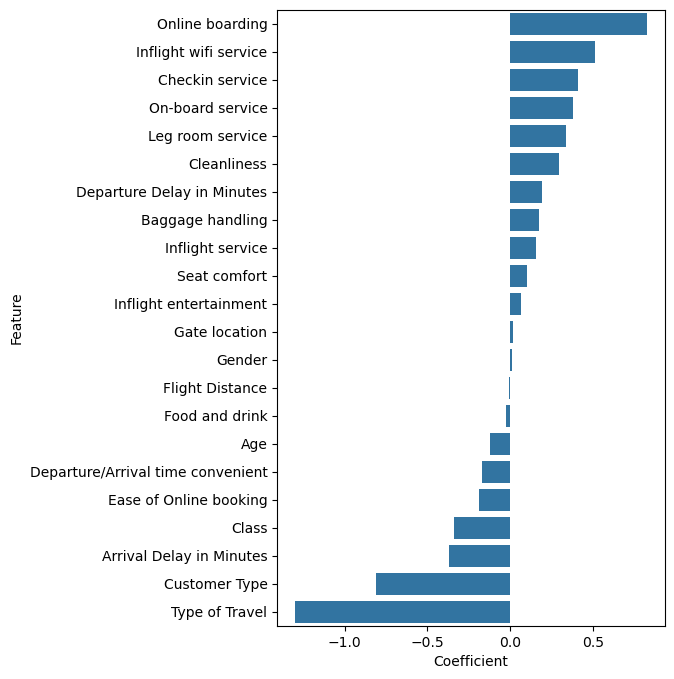

In [38]:
plt.figure(figsize=(5, 8))
sns.barplot(data = sorted_df,
           x = 'Coefficient',
           y = 'Feature');

Online Boarding has the strongest positive influence on the satisfaction rating. Online Boarding is extreamly valued to passengers.

Type of Travel has the strongest negative influence on the satisfaction rating. People seem to be extremely disatisfied just by the type of travel they are participating in.

Gate Location, Gender, Flight Distance, Food and drink, all have the weakest influence on the satisfaction rating. It does not matter if the service is great or bad, the effect is going to be minimum on the satisfaction.

In [39]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [40]:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 23 columns]


In [41]:
df = df.fillna(df.mean())